# ValenBisi
El conjunto de datos proviene de una descarga de datos del servicio web de la empresa municipal ValenBisi, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 10 minutos de las estaciones:

https://valencia.opendatasoft.com/explore/dataset/valenbisi-disponibilitat-valenbisi-dsiponibilidad/information/

- **updated**: Fecha y hora en la que se registró el estado de la estación.
- **address**: Dirección o ubicación de la estación.
- **number**: Identificador único de la estación.
- **available**: Número de bicicletas disponibles en la estación.
- **lat**: Latitud de la ubicación de la estación.
- **lon**: Longitud de la ubicación de la estación.
- **total**: Número total de bornetas (anclajes) en la estación.
- **open**: Indica si la estación está operativa (T para sí, F para no).
- **free**: Número de bornetas libres en la estación.

## 00
Librerías

In [16]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

try:
    import pandas as pd
except:
    install('pandas')
    import pandas as pd

try:
    import numpy as np
except:
    install('numpy')
    import numpy as np

try:
    import matplotlib.pyplot as plt
except:
    install('matplotlib')
    import matplotlib.pyplot as plt
try:
    import folium
except:
    install('folium')
    import folium

## 01
Carga de datos de csv (estaciones_bici.csv) en un DataFrame y exploración de datos.

La primera columna del fichero debe aparecer como índice del DataFrame.

Estudia el dataset

Indica cuantas estaciones hay y listalas


In [35]:
df  = pd.read_csv('estaciones_bici.csv', sep = '|', index_col=0)
df.head()

,updated,address,number,available,lat,lon,total,open,free
72967,2023-05-04 16:20:06,Peris y Valero - Cuba,39,5,39.457854,-0.373931,19,T,14
94523,2023-05-04 16:20:06,Pintor Luis Arcas - Inst. Obrero Valenciano,46,4,39.455509,-0.358787,20,T,16
193949,2023-05-04 16:20:06,Alfonso el Magnánimo - Nave,13,15,39.472062,-0.370874,24,T,9
30541,2023-05-04 16:20:06,Angel Guimerá - Juan Llorens,22,4,39.469787,-0.388353,15,T,11
63530,2023-05-04 16:20:06,Fernando el Católico - Cuenca,24,7,39.469077,-0.384027,20,T,11


In [36]:
print("Información del DataFrame:")
print(df.info())

print("\nDimensiones del DataFrame:")
print(df.shape)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nTipos de datos por columna:")
print(df.dtypes)





Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 222180 entries, 72967 to 10590
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   updated    222180 non-null  object 
 1   address    222180 non-null  object 
 2   number     222180 non-null  int64  
 3   available  222180 non-null  int64  
 4   lat        222180 non-null  float64
 5   lon        222180 non-null  float64
 6   total      222180 non-null  int64  
 7   open       222180 non-null  object 
 8   free       222180 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 17.0+ MB
None

Dimensiones del DataFrame:
(222180, 9)

Valores nulos por columna:
updated      0
address      0
number       0
available    0
lat          0
lon          0
total        0
open         0
free         0
dtype: int64

Tipos de datos por columna:
updated       object
address       object
number         int64
available      int64
lat          floa

In [37]:
# cuantas estaciones 
unique_addresses = df['address'].unique() # devuelve un array con los valores unicos de la columna
unique_addresses = len(unique_addresses) 
print("Hay", unique_addresses, "estaciones de bicicletas.")


Hay 276 estaciones de bicicletas.


## 02
Calcula las bicis que suelen estar disponibles en cada estacion

Sobre el resultado anterior, muestra un listado, ordenado de mayor a menor, de las estaciones que tienen una media de la columna 'available' igual o superior a 15.

Imprime el número de registros que tiene el resultado final.

In [44]:
# Calcula la media de la columna 'available' y obten como resultado un dataframe con 'address', 'number' y la media calculada por estación.
# Agrupa los datos por el número de estación ('number') y calcula la media de la columna 'available'
media_por_estacion_raw = df.groupby('number')['available'].mean().reset_index()

# Redondea los valores de la columna 'available' a 0 decimales
media_por_estacion_raw['available'] = media_por_estacion_raw['available'].round(0)

# Combina los datos de las estaciones (número y dirección) con las medias calculadas porque se necesita la dirección de la estación
media_por_estacion = pd.merge(
    df[['number', 'address']].drop_duplicates(),  # Selecciona columnas únicas de número y dirección
    media_por_estacion_raw,                      # DataFrame con las medias calculadas
    on='number',                                 # Une los DataFrames por la columna 'number'
    how='left'                                   # Mantiene todas las estaciones, incluso si no tienen datos de 'available'
)

# Filtra las estaciones con una media de bicicletas disponibles mayor o igual a 15 y las ordeno de mayor a menor
media_por_estacion_sort_15 = media_por_estacion[ media_por_estacion['available'] >= 15].sort_values(by='available', ascending=False)

# Muestra las estaciones
display(media_por_estacion_sort_15)
print(f'Número de registros: {media_por_estacion_sort_15.shape[0]}')

,number,address,available
236,101,Marino Blas de Lezo (estación Cabañal Adif),23.0
31,93,Blasco Ibañez - Poeta Durán Tortajada,21.0
57,124,Azagador de Alboraya - Dolores Marqués,21.0
37,112,Manuel Broseta i Pont - Naranjos,19.0
143,192,Cra. Malilla - Oltá,17.0
221,110,UPV Trinquet,17.0
142,180,Doctor Waksman - Nieves,17.0
60,179,Av. de la Plata - Zapadores,17.0
108,69,Av. Puerto - Serrería,17.0
49,193,Uruguay - Carteros,16.0


Número de registros: 20


## 03
Sobre el restulado anterior, muestra solamente el número de estación y dirección de la septima estación con la media más baja de bicis 

In [49]:
septima_estacion = media_por_estacion_sort_15.iloc[-7]


info_septima_estacion = pd.DataFrame({
    'number': [septima_estacion['number']],
    'address': [septima_estacion['address']]
})

display(info_septima_estacion)


,number,address
0,123,Albocácer - Vinaroz


## 04
Selecciona todos los registros del fichero original de la estación resultado del anterior apartado y establece como índice la columna 'updated'. 

Ordena el dataframe sobre el nuevo índice de forma ascendente y muestra las tres primeras filas.

> Pista, es necesario cambiar el índice a uno tipo fecha.

In [50]:
df_date = pd.read_csv('estaciones_bici.csv', sep='|', index_col='updated')
registros_estacion_7 = df_date[df_date['number'] == info_septima_estacion['number'].iloc[0]]
display(registros_estacion_7)

,Unnamed: 0,address,number,available,lat,lon,total,open,free
updated,,,,,,,,,
2023-05-04 16:20:06,60856,Albocácer - Vinaroz,123,19,39.487671,-0.364841,20,T,1
2023-05-04 16:29:13,32617,Albocácer - Vinaroz,123,19,39.487671,-0.364841,20,T,1
2023-05-04 16:39:47,38592,Albocácer - Vinaroz,123,18,39.487671,-0.364841,20,T,2
2023-05-04 16:49:55,47228,Albocácer - Vinaroz,123,18,39.487671,-0.364841,20,T,2
2023-05-04 17:00:06,79841,Albocácer - Vinaroz,123,16,39.487671,-0.364841,20,T,4
...,...,...,...,...,...,...,...,...,...
2023-05-10 11:59:34,178091,Albocácer - Vinaroz,123,10,39.487671,-0.364841,20,T,10
2023-05-10 12:59:27,173959,Albocácer - Vinaroz,123,9,39.487671,-0.364841,20,T,11
2023-05-10 13:59:22,129888,Albocácer - Vinaroz,123,10,39.487671,-0.364841,20,T,10


## 05

Realiza una gráfica de tipo línea, sobre las bicis disponibles (available) con el dataframe resultado del anterior apartado.

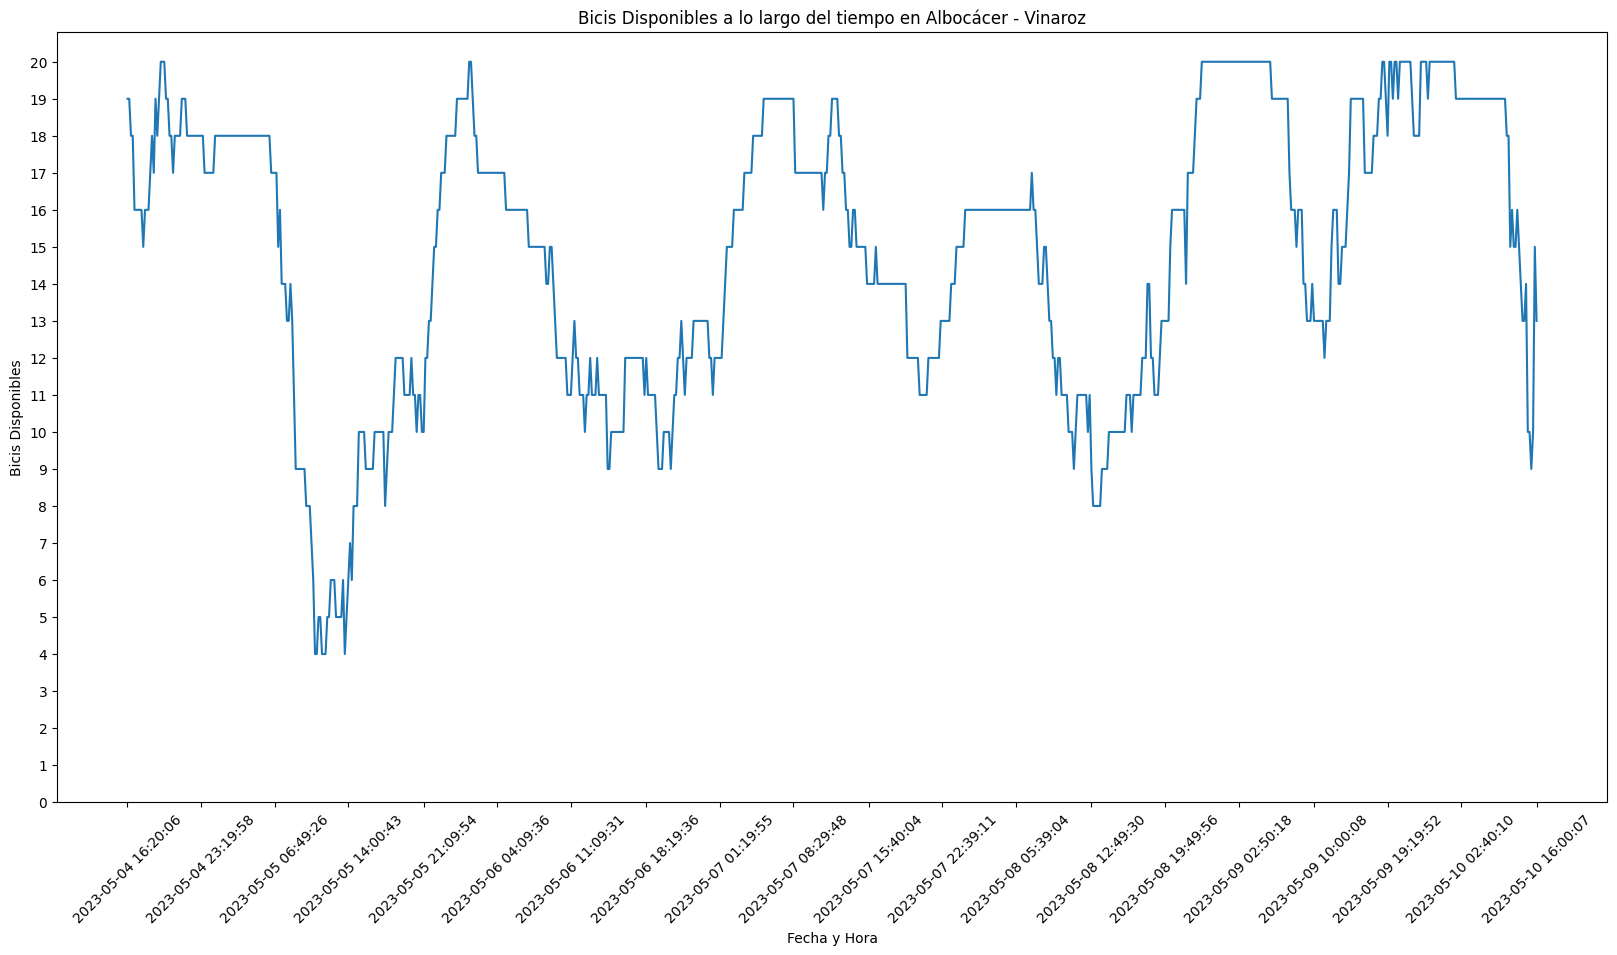

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(registros_estacion_7.index, registros_estacion_7['available'])

plt.title(f'Bicis Disponibles a lo largo del tiempo en {registros_estacion_7["address"].iloc[0]}')
plt.xlabel('Fecha y Hora')
plt.ylabel('Bicis Disponibles')
plt.ylim(0)  # Establece el inicio del eje y en 0

# Selecciona 20 índices equidistantes para las etiquetas del eje x
x_ticks_indices = np.linspace(0, len(registros_estacion_7.index) - 1, 20, dtype=int)
x_ticks_labels = registros_estacion_7.index[x_ticks_indices]
plt.xticks(x_ticks_labels, rotation=45)

# Configura el eje y para que muestre hasta el maximo y que sean enteros
y_max = registros_estacion_7['available'].max()
plt.yticks(range(0, int(y_max) + 1))

plt.show()

## 06
Usa un mapa para ver las estaciones

que se vean solo las 10 mas usadas 

haz un mapa de calor

In [57]:



media_por_estacion_ubi = pd.merge(
    df[['number', 'address', 'lat', 'lon']].drop_duplicates(),  
    media_por_estacion_raw,                                    
    on='number',                                               
    how='left'                                                 
)

# Crea un mapa centrado valencia con las estaciones
mapa = folium.Map(location=[39.46975, -0.37739], zoom_start=14)

for _, row in media_por_estacion_ubi.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"{row['address']}<br>Media de disponibles: {row['available']}",
        tooltip=row['address']
    ).add_to(mapa)
mapa


In [58]:
# Filtra las 10 estaciones más usadas usa el df media_por_estacion_ubi
top_10_estaciones = media_por_estacion_ubi.sort_values(by='available', ascending=False).head(10)


mapa_top_10 = folium.Map(location=[39.46975, -0.37739], zoom_start=14)
for _, row in top_10_estaciones.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"{row['address']}<br>Media de disponibles: {row['available']}",
        tooltip=row['address']
    ).add_to(mapa_top_10)
mapa_top_10

In [59]:
from folium.plugins import HeatMap

mapa_calor = folium.Map(location=[39.46975, -0.37739], zoom_start=14)

heat_data = media_por_estacion_ubi[['lat', 'lon', 'available']].values.tolist()

HeatMap(heat_data, radius=15).add_to(mapa_calor)

mapa_calor